# Data Preprocessing and Analysis 

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [114]:
data = pd.read_csv("../../dataset/dataset.csv")

In [115]:
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


## Randomly splitting the dataset into 3 parts

In [116]:
historyData = data.sample(frac=0.5)
incrementalData = data.drop(historyData.index)
incrementalData1 = incrementalData.sample(frac=0.5)
incrementalData2 = incrementalData.drop(incrementalData1.index)

In [117]:
historyData.to_csv("../../dataset/historyData/historyData.csv", index=False)
incrementalData1.to_csv("../../dataset/incrementalData/incData1.csv", index=False)
incrementalData2.to_csv("../../dataset/incrementalData/incData2.csv", index=False)

## Data preprocessing and analysis

In [146]:
data = pd.read_csv("../../dataset/incrementalData/incData1.csv")
data.shape

(22928, 85)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45856 entries, 0 to 45855
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   45856 non-null  int64  
 1   patient_id                     45856 non-null  int64  
 2   hospital_id                    45856 non-null  int64  
 3   age                            43780 non-null  float64
 4   bmi                            44184 non-null  float64
 5   elective_surgery               45856 non-null  int64  
 6   ethnicity                      45172 non-null  object 
 7   gender                         45840 non-null  object 
 8   height                         45196 non-null  float64
 9   icu_admit_source               45801 non-null  object 
 10  icu_id                         45856 non-null  int64  
 11  icu_stay_type                  45856 non-null  object 
 12  icu_type                       45856 non-null 

In [120]:
# Dropping the null column
data.drop("Unnamed: 83", axis=1, inplace=True)

### Getting the null values

In [121]:
missing_value = ((data.isnull().sum())/len(data)) * 100 
#missing_value.to_dict()
missing_value

encounter_id                   0.000000
patient_id                     0.000000
hospital_id                    0.000000
age                            4.527216
bmi                            3.646197
                                 ...   
lymphoma                       0.776343
solid_tumor_with_metastasis    0.776343
apache_3j_bodysystem           1.770761
apache_2_bodysystem            1.770761
hospital_death                 0.000000
Length: 84, dtype: float64

In [122]:
numerical_data = [num for num in data.drop("hospital_death", axis=1).columns if data[num].dtype!="O"]
categorical_data = [cat for cat in data.drop("hospital_death", axis=1).columns if cat not in numerical_data]
numerical_data

['encounter_id',
 'patient_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'icu_id',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 

In [123]:
categorical_data

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

### taking care of missing values in categorical data

In [124]:

for i in categorical_data:
    print(f"{i}: {data[i].unique()}")

ethnicity: ['Asian' 'Caucasian' 'African American' 'Hispanic' nan 'Other/Unknown'
 'Native American']
gender: ['F' 'M' nan]
icu_admit_source: ['Accident & Emergency' 'Operating Room / Recovery' 'Floor'
 'Other Hospital' 'Other ICU' nan]
icu_stay_type: ['admit' 'transfer' 'readmit']
icu_type: ['Med-Surg ICU' 'CCU-CTICU' 'SICU' 'Neuro ICU' 'MICU' 'Cardiac ICU'
 'CSICU' 'CTICU']
apache_3j_bodysystem: ['Respiratory' 'Cardiovascular' 'Trauma' 'Gastrointestinal' 'Sepsis'
 'Metabolic' 'Neurological' nan 'Hematological' 'Genitourinary'
 'Gynecological' 'Musculoskeletal/Skin']
apache_2_bodysystem: ['Respiratory' 'Cardiovascular' 'Trauma' 'Gastrointestinal' 'Metabolic'
 'Neurologic' nan 'Haematologic' 'Renal/Genitourinary'
 'Undefined diagnoses' 'Undefined Diagnoses']


In [125]:
cat_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data[categorical_data] = cat_imp.fit_transform(data[categorical_data])

In [126]:
data[categorical_data].isnull().sum()

ethnicity               0
gender                  0
icu_admit_source        0
icu_stay_type           0
icu_type                0
apache_3j_bodysystem    0
apache_2_bodysystem     0
dtype: int64

### Taking care of missing values in numerical cols

In [127]:
data[numerical_data].isnull().sum()

encounter_id                      0
patient_id                        0
hospital_id                       0
age                            2076
bmi                            1672
                               ... 
hepatic_failure                 356
immunosuppression               356
leukemia                        356
lymphoma                        356
solid_tumor_with_metastasis     356
Length: 76, dtype: int64

In [128]:
num_imp = SimpleImputer(missing_values=np.nan, strategy="mean")
data[numerical_data] = num_imp.fit_transform(data[numerical_data])

In [129]:
data[numerical_data].isnull().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
age                            0
bmi                            0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 76, dtype: int64

### Remove non-correlated data

In [130]:
corr = data.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
data.drop(to_drop, axis=1, inplace=True)

C:\Users\debor\AppData\Local\Temp\ipykernel_13308\1349432385.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs()


In [131]:
data.shape

(45856, 72)

In [132]:
data.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min',
       'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min',
       'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       '

In [133]:
# remove all the columns not requred from numerical col list and categorical call list
for not_req in to_drop:
    if not_req in numerical_data:
        numerical_data.remove(not_req)
    elif not_req in categorical_data:
        categorical_data.remove(not_req)
    else:
        pass

In [134]:
len(numerical_data)+len(categorical_data)

71

<AxesSubplot: >

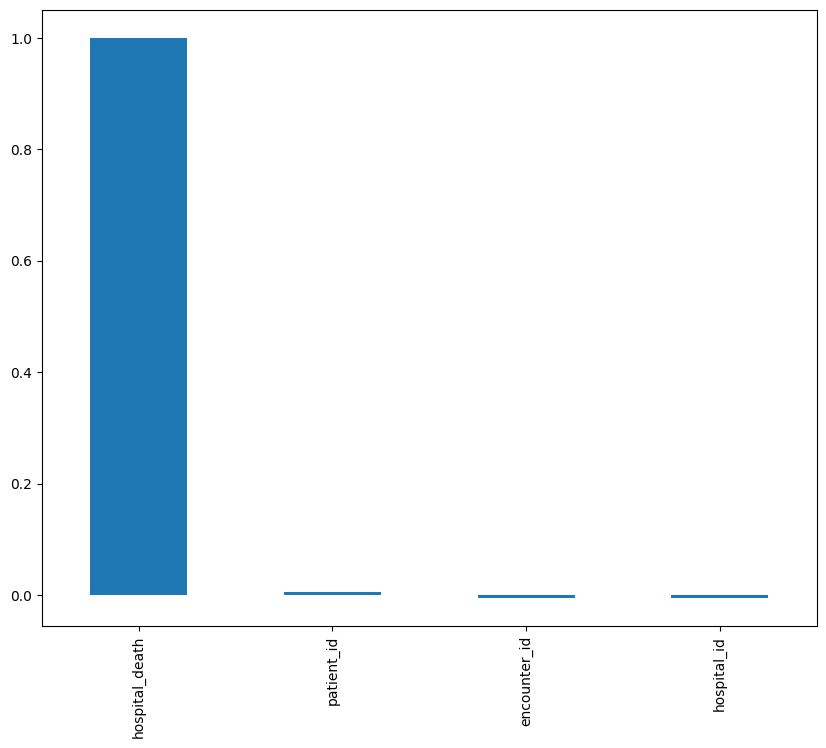

In [135]:
### lets find out, if id columns are required or not 
# 1. encounter_id
# 2. patient_id
# 3. hospital_id
plt.figure(figsize=(10, 8))
data[["encounter_id", "patient_id", "hospital_id", "hospital_death"]].corr()['hospital_death'].sort_values(ascending=False).plot(kind="bar")




#### as we can see the above ID cols are not usefull, so we can delete it 

In [136]:
data.drop(["encounter_id", "patient_id", "hospital_id"], axis=1, inplace=True)

#### lets see if class imbalance is present or not 

<AxesSubplot: xlabel='hospital_death', ylabel='count'>

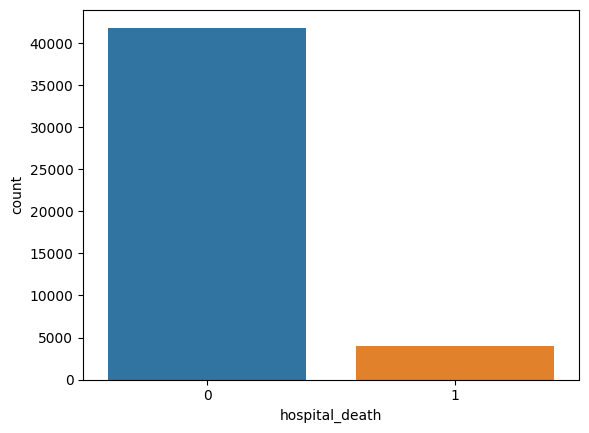

In [137]:
sns.countplot(data=data, x="hospital_death")

#### As we can see there is a huge class imbalance, lets use oversampling to solve this issue.

In [138]:
data_majority = data[data.hospital_death == 0]
data_minority = data[data.hospital_death == 1]

data_minority_upsampled = resample(
    data_minority,
    replace=True,
    n_samples=data_majority.shape[0],
    random_state=42
)

data = pd.concat([data_majority, data_minority_upsampled])
data.hospital_death.value_counts()

0    41860
1    41860
Name: hospital_death, dtype: int64

### Dividing the dataset into features and labels 

In [139]:
features = data.drop('hospital_death', axis=1)
labels = data['hospital_death']

In [140]:
features

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,29.000000,40.898275,0.0,Asian,F,164.0,Accident & Emergency,413.0,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
1,78.000000,24.218196,1.0,Caucasian,F,157.4,Operating Room / Recovery,512.0,admit,CCU-CTICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
2,54.000000,45.680937,0.0,Caucasian,M,180.3,Accident & Emergency,543.0,admit,Med-Surg ICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
3,62.345066,28.690874,0.0,African American,M,177.8,Accident & Emergency,504.0,admit,SICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
4,82.000000,27.297959,0.0,Caucasian,F,175.0,Floor,413.0,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gastrointestinal,Gastrointestinal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,68.000000,27.140871,0.0,Caucasian,M,177.8,Accident & Emergency,498.0,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
31747,59.000000,21.290656,0.0,Caucasian,M,172.7,Accident & Emergency,678.0,admit,MICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
20012,71.000000,31.727860,0.0,Hispanic,M,175.3,Floor,290.0,admit,Med-Surg ICU,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
37483,70.000000,47.223669,0.0,Caucasian,F,162.5,Floor,252.0,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [141]:
# creating dummy variables using pd.get_dummies
features = pd.get_dummies(features)
features.shape

(83720, 106)

In [142]:
# Standardising the data
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [144]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66976, 106), (16744, 106), (66976,), (16744,))

In [145]:
to_drop

['d1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min']